# Advanced Cartography (Part 2)
This is the second part of "Advanced Cartography" series. To learn more about the advanced usage of Renderer options in Map Widget, e.g. Class Breaks in size and colors, and Unique Value Renderers, for numeric or orderable data, please refer to "Part 1" (`advanced-cartography-part1.ipynb`). The purpose of this series is to demo how to freely customize your own style or symbolizing. For previous coverage of map widgets, please go to [using the map widget](https://developers.arcgis.com/python/guide/using-the-map-widget) and [Advanced Map Widget Usage](https://developers.arcgis.com/python/guide/advanced-map-widget-useage/)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Advanced-Cartography-(Part-2)" data-toc-modified-id="Advanced-Cartography-(Part-2)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Advanced Cartography (Part 2)</a></span><ul class="toc-item"><li><span><a href="#Part-2.-Style-based-on-categorical-data" data-toc-modified-id="Part-2.-Style-based-on-categorical-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Part 2. Style based on categorical data</a></span><ul class="toc-item"><li><span><a href="#Section-2.1-Types-(Unique-symbols)" data-toc-modified-id="Section-2.1-Types-(Unique-symbols)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Section 2.1 Types (Unique symbols)</a></span></li><li><span><a href="#Section-2.2-Styled-with-1-category/type-and-1-numeric-attribute" data-toc-modified-id="Section-2.2-Styled-with-1-category/type-and-1-numeric-attribute-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Section 2.2 Styled with 1 category/type and 1 numeric attribute</a></span></li></ul></li><li><span><a href="#Part-3.-Styled-with-date/time-attribute(s)" data-toc-modified-id="Part-3.-Styled-with-date/time-attribute(s)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Part 3. Styled with date/time attribute(s)</a></span><ul class="toc-item"><li><span><a href="#Section-3.1-Styled-with-1-date/time-attribute" data-toc-modified-id="Section-3.1-Styled-with-1-date/time-attribute-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Section 3.1 Styled with 1 date/time attribute</a></span></li><li><span><a href="#Section-3.2-Styled-with-1-date/time-attribute-and-1-numeric-attribute" data-toc-modified-id="Section-3.2-Styled-with-1-date/time-attribute-and-1-numeric-attribute-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Section 3.2 Styled with 1 date/time attribute and 1 numeric attribute</a></span></li><li><span><a href="#Section-3.3-Styled-with-1-date/time-attribute-and-1-category/type-attribute" data-toc-modified-id="Section-3.3-Styled-with-1-date/time-attribute-and-1-category/type-attribute-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Section 3.3 Styled with 1 date/time attribute and 1 category/type attribute</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

As usual, start by connecting to your GIS. You can use either an existing profile, or just type `GIS(url="your enterprise", username='user name', password='password')` to set up the connection.

In [1]:
from arcgis.gis import GIS
gis = GIS(url='https://pythonapi.playground.esri.com/portal', username='arcgis_python', password='amazing_arcgis_123')

## Part 2. Style based on categorical data

Map Viewer allows you to explore your data in different ways through a variety of styles. Now that you have mastered some basic styles of visualizing numeric or orderable data, let's move on to style your map based on categorical data.

### Section 2.1 Types (Unique symbols)

Use unique symbols to show different types of things (categorical data), not counts or numeric measurements. For example, you can use different colors to represent different rail lines in the city. More documentation please refer to [Types (Unique symbols)](http://doc.arcgis.com/en/arcgis-online/create-maps/style-categories.htm#ESRI_SECTION1_1084DA17FD3C470B87A004AB55132D38)

In the example of `map6`, since the two Map Services already carry `renderer` in the service resource, we do not need to further set up this property or so called the `drawingInfo` for them to be displayed. Otherwise, check the example for `map7` to see how you can customize the settings. 

In [2]:
from arcgis.layers import Service

MapView(layout=Layout(height='400px', width='100%'), zoom=11.0)


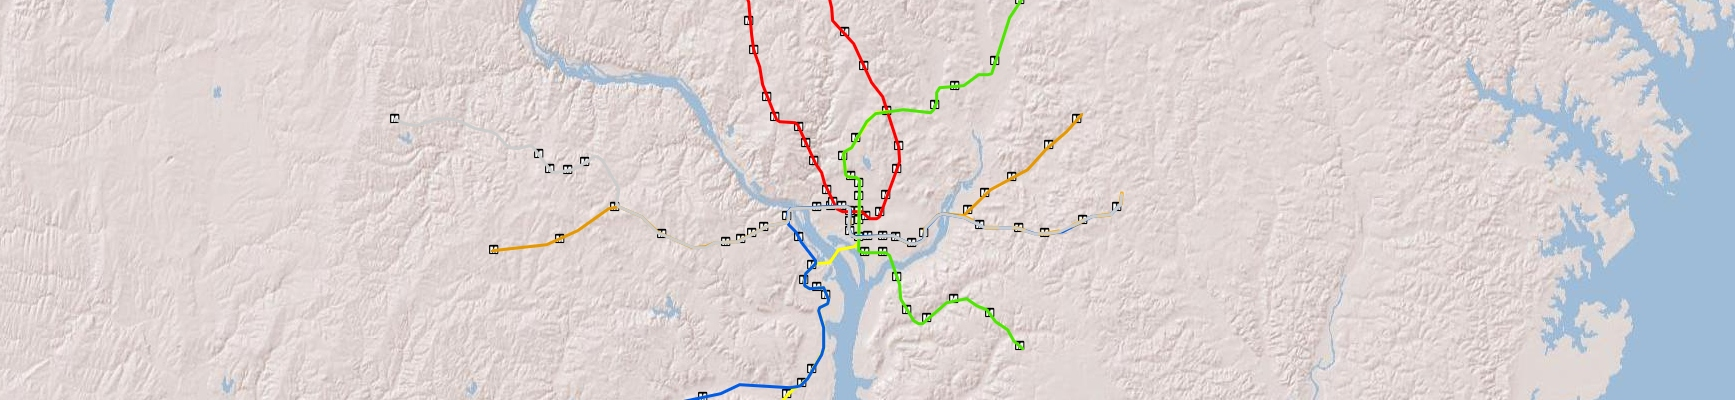

In [8]:
"""
    # with category
    # Unique symbols
    # .../MapServer/58 points to the Map Service REST endpoint of different rail lines in the D. C.
    # .../MapServer/51 points to the Map Service REST endpoint of the metro stops
"""
map6 = gis.map("D. C., USA")

map_url = "http://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/"
map6_flayer = Service(map_url+str(58))    
map6.content.add(map6_flayer)    

map6_flayer = Service(map_url+str(51))    
map6.content.add(map6_flayer)    

map6

### Section 2.2 Styled with 1 category/type and 1 numeric attribute
This style (types and sizes) allows you to represent your data using different sizes and different categories by color. Choose a text, date, or numeric field for unique values, and a numeric field for size values, and adjust each attribute's map symbol settings as needed. For example, use this style when you want to show a count attribute such as the number of people who have a graduate degree, and use a unique color for each value found in another field such as a county name.

In [ ]:
"""
    # with category and 1 numeric attribute
    # types and sizes
    # The field used here represent a count attribute such as the number of people who have a graduate degree, and use a unique color for each value found in another field such as a county name.
"""
from arcgis.map.renderers import SimpleRenderer
from arcgis.map.symbols import SimpleFillSymbolEsriSFS
map7 = gis.map("New York City, USA")

map7_renderer = SimpleRenderer(
    symbol = SimpleFillSymbolEsriSFS(
      color=[0, 0, 0, 60],
      outline={
        "color": [0, 0, 0, 255],
        "width": 0.75,
        "type": "esriSLS",
        "style": "esriSLSNull"
      },
      style="esriSFSSolid",
    )
)

map7_f1_layer = Service("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/Census_Counties_20m/FeatureServer/0")
map7.content.add(map7_f1_layer,
               drawing_info={
                 "renderer": map7_renderer
                })

map7_f2_layer = Service("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/NY Educational Attainment/FeatureServer/0")
map7.content.add(map7_f2_layer)

map7

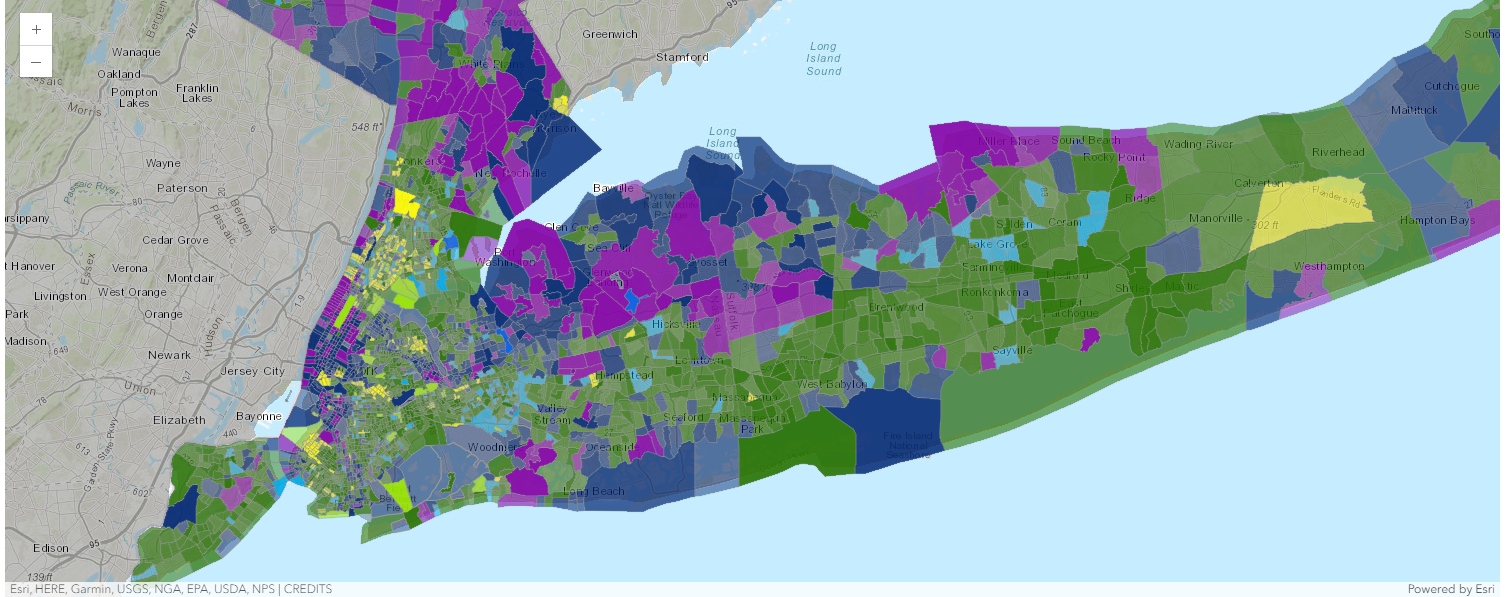

## Part 3. Styled with date/time attribute(s)

An important element of mapping that we have not covered so far is the change of time. Styling the spatial representation on the time axis is becoming increasingly popular. In the sections below, let's discuss (1) style with date/time attribute, (2) style with date/time attribute and a numeric attribute, and (3) style with date/time attribute and category attribute. Find out more about this topic in [Styled with date/time attribute(s)](http://doc.arcgis.com/en/arcgis-online/create-maps/style-time.htm#ESRI_SECTION1_221C06A43F2D4375BCF519EB4D80877D)

### Section 3.1 Styled with 1 date/time attribute

One of the styles is to show the age of attributes (length of time) in colors. If your layer contains date or time values, you may want to use color to represent the age of features. Age reflects the length of time (in seconds, minutes, hours, days, months, or years) from a start date or time to an end date or time. For example, by applying this style to a parcels layer using the sale date attribute and the current date to specify the period of time, you can use color to show which homes in a neighborhood were sold more than 15 years ago and which were sold more recently. Check out more in [Styled with 1 date/time attribute](http://doc.arcgis.com/en/arcgis-online/create-maps/style-time.htm#ESRI_SECTION1_221C06A43F2D4375BCF519EB4D80877D)

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)


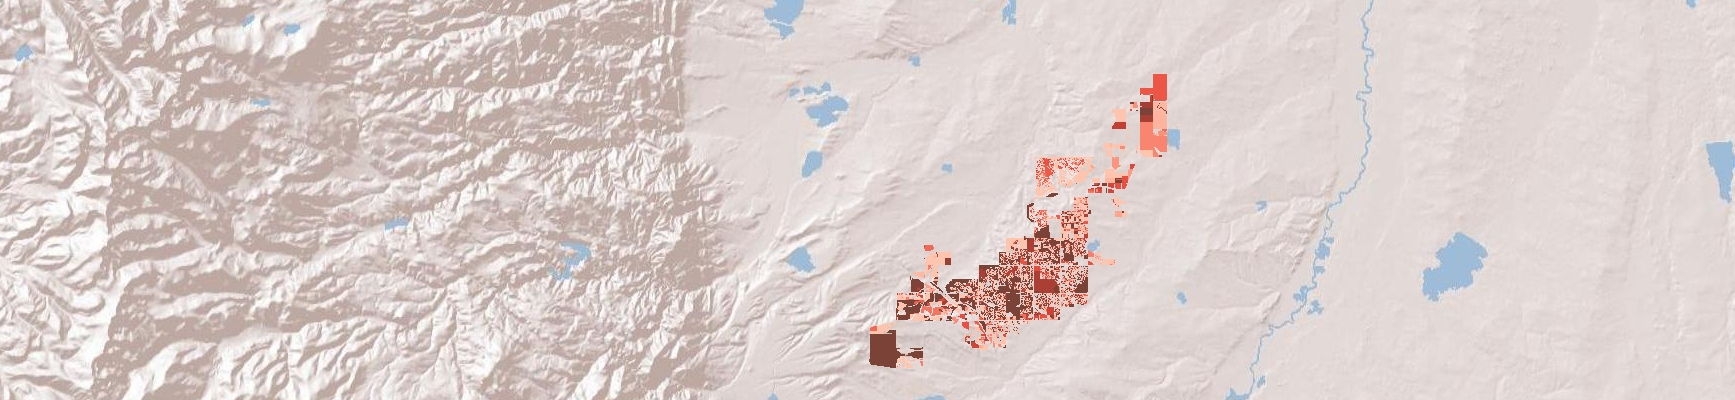

In [10]:
"""
    # 1 date/time attribute
    # (a) Age (Color)
    # The field used here represent which homes in a neighborhood were sold more than 15 years ago and which were sold more recently
"""
mapA = gis.map("Boulder, CO, USA", 10)

mapA_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "minValue":-9007199254740991}

mapA_valueExpression = "var startTime = $feature.SALEDATE;\
                        var endTime = 1464917820000;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                            startTime = Date(startTime);\
                            endTime = Date(endTime);\
                            retVal = DateDiff(endTime, startTime, 'years');\
                        }\
                        return retVal;"

mapA_renderer["valueExpression"] = mapA_valueExpression

mapA_renderer["visualVariables"] = [    {   "type": "colorInfo",
                                            "valueExpression": mapA_valueExpression,
                                            "stops": [  {   "value": 1,
                                                            "color": [255,196,174,255],
                                                            "label": "< 1"
                                                        },
                                                        {   "value": 4.5,
                                                            "color": [249,129,108,255],
                                                            "label": "1 <= value < 4.5"
                                                        },  
                                                        {   "value": 8,
                                                            "color": [236,82,68,255],
                                                            "label": "4.5 <= value < 11.5"
                                                        },
                                                        {   "value": 11.5,
                                                            "color": [194,61,51,255],
                                                            "label": "11.5 <= value < 15"
                                                        },
                                                        {   "value": 15,
                                                            "color": [123,66,56,255],
                                                            "label": "> 15"
                                                        }],
                                            "legendOptions": {
                                                "title": "Age, in years, from Sale Date to 6/2/2016"
                                            }
                                        },
                                        {
                                            "type": "sizeInfo",
                                            "target": "outline",
                                            "expression": "view.scale",
                                            "stops": [  {   "size": 1.5,
                                                            "value": 713
                                                        },
                                                        {   "size": 0.75,
                                                            "value": 2228
                                                        },
                                                        {   "size": 0.375,
                                                            "value": 8911
                                                        },
                                                        {   "size": 0,
                                                            "value": 17822
                                                        }]
                                        }]

mapA_renderer["classBreakInfos"] = [    {   "symbol": {
                                                "color": [170,170,170,255],
                                                "outline": {
                                                    "color": [128,128,128,128],
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSSolid"
                                                },
                                                "type": "esriSFS",
                                                "style": "esriSFSSolid"
                                            },
                                            "classMaxValue": 9007199254740991
                                        }]

mapA_flayer = FeatureLayer("https://services1.arcgis.com/vXSRPZbyyOmH9pek/arcgis/rest/services/Parcels/FeatureServer/0")

mapA.add_layer(mapA_flayer,
               { "type": "FeatureLayer",
                 "renderer": mapA_renderer})

mapA

### Section 3.2 Styled with 1 date/time attribute and 1 numeric attribute
You can use these styles (e.g. Color (Age) and Size and Color and Size (Age)) to show two attributes on your map using color and proportional symbols to see the age of features in your data. Age reflects the length of time (in seconds, minutes, hours, days, months, or years) from a start date or time to an end date or time. The Color (Age) and Size or Color and Size (Age) style can be used when you choose one date attribute and one numeric attribute, or two date attributes. For example, in a map showing approximate locations where migrants went missing, you can use color to show when migrants went missing based on the date the incident was reported, and use proportional symbols to show how many migrants were found dead. Find more details about these styles at [Styled with 1 date/time attribute and 1 numeric attribute](http://doc.arcgis.com/en/arcgis-online/create-maps/style-time.htm#ESRI_SECTION1_4E026F582F9647929A12FA06EB956F72)

MapView(layout=Layout(height='400px', width='100%'), zoom=6.0)


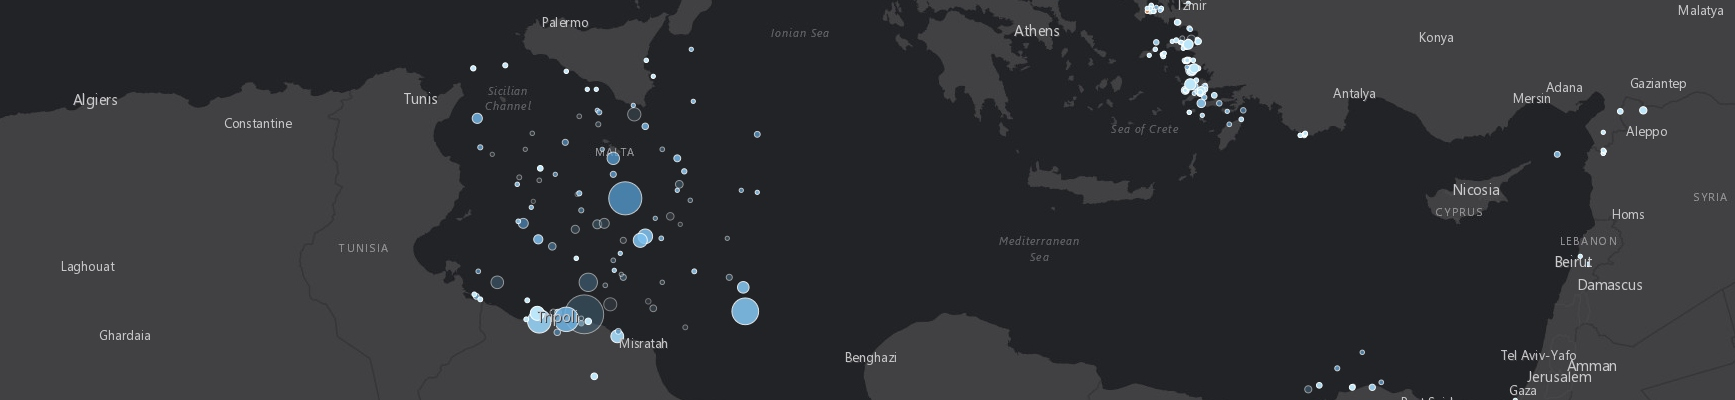

In [11]:
"""
    # 1 date/time attribute and and 1 numeric attribute
    # (b) Color (Age) and Size
    # The field used here represent when migrants went missing based on the date the incident was reported, and use proportional symbols to show how many migrants were found dead
"""
mapB = gis.map("Mediterranean Sea", 6)
mapB.basemap = mapB.basemaps[0]

mapB_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",
                 "field": "DEAD",  
                 "minValue":-9007199254740991}

mapB_valueExpression = "var startTime = $feature.DATEREPORTED;\
                        var endTime = 1466053210029;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                            startTime = Date(startTime);\
                            endTime = Date(endTime);\
                            retVal = DateDiff(endTime, startTime, 'months');\
                        }\
                        return retVal;"

mapB_renderer["visualVariables"] = [    {   "type": "colorInfo",
                                            "valueExpression": mapB_valueExpression,
                                            "stops": [  {   "value": 6,
                                                            "color": [188,230,249,255],
                                                            "label": "< 6"
                                                        },
                                                        {   "value": 10.5,
                                                            "color": [116,187,237,255],
                                                            "label": "6 ~ 10.5"
                                                        },
                                                        {   "value": 15,
                                                            "color": [77,150,206,255],
                                                            "label": "10.5 ~ 19.5"
                                                        },
                                                        {   "value": 19.5,
                                                            "color": [72,121,157,255],
                                                            "label": "19.5 ~ 24"
                                                        },
                                                        {   "value": 24,
                                                            "color": [64,77,84,255],
                                                            "label": "> 24"
                                                        }],
                                            "legendOptions": {"title": "Age, in months, from DATEREPORTED to 6/15/2016"}
                                        },
                                        {   "type": "transparencyInfo",
                                            "field": "DATEREPORTED",
                                            "stops": [  {   "value": 1388563200000,
                                                            "transparency": 70
                                                        },
                                                        {   "value": 1451635200000,
                                                            "transparency": 0
                                                        }]
                                        },
                                        {   "type": "sizeInfo",
                                            "field": "DEAD",
                                            "valueUnit": "unknown",
                                            "minSize": 3,
                                            "maxSize": 33.75,
                                            "minDataValue": 0,
                                            "maxDataValue": 200
                                        }]

mapB_renderer["classBreakInfos"] = [    {   "symbol": {
                                                "color": [227,139,79,255],
                                                "size": 9,
                                                "angle": 0,
                                                "xoffset": 0,
                                                "yoffset": 0,
                                                "type": "esriSMS",
                                                "style": "esriSMSCircle",
                                                "outline": {
                                                    "color": "White",
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSNull"
                                                }
                                            },
                                            "classMaxValue": 9007199254740991
                                        }]

mapB_flayer = FeatureLayer("https://services1.arcgis.com/4yjifSiIG17X0gW4/arcgis/rest/services/Missing Migrants - Incident Reports/FeatureServer/0")

mapB.add_layer(mapB_flayer,
               { "type": "FeatureLayer",
                 "renderer": mapB_renderer})

mapB

### Section 3.3 Styled with 1 date/time attribute and 1 category/type attribute

If your layer contains unique values (types) and date or time values, you can use color to show different categories, or types, of features based on the unique values, and proportional symbols to show the age of features. Age reflects the length of time (in seconds, minutes, hours, days, months, or years) from a start date or time to an end date or time. For example, in a map comparing Visa and Amex credit card payments, you can use a different color to represent each credit card company and different-sized symbols to show the length of time since payment.

MapView(layout=Layout(height='400px', width='100%'), zoom=12.0)


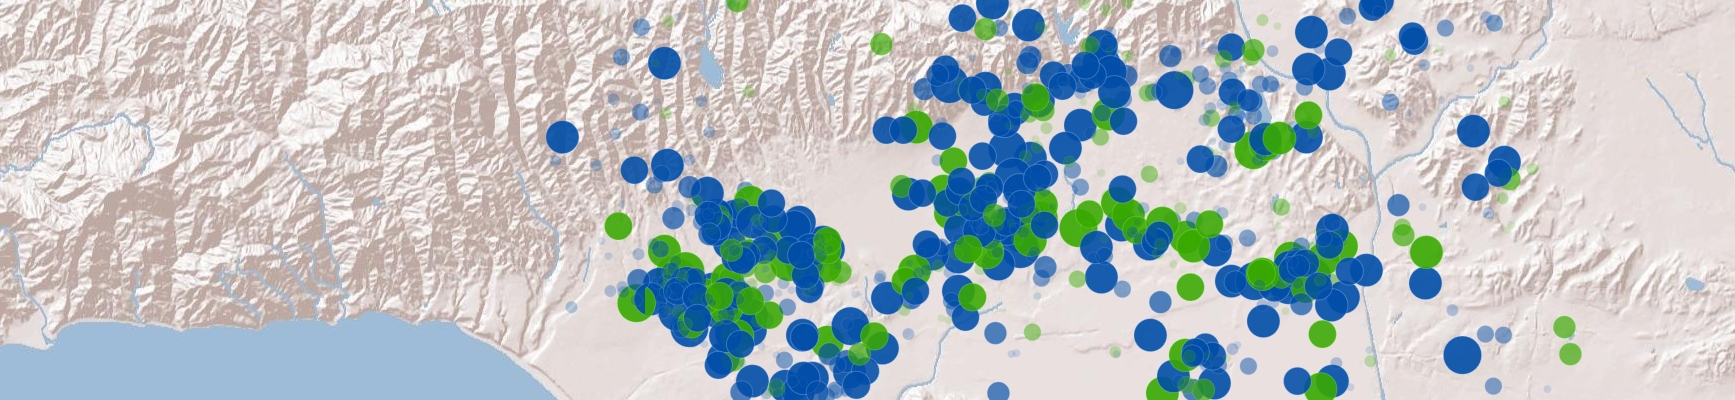

In [15]:
"""
    # 1 date/time attribute and 1 category/type attribute
    # (c) Types and Size (Age)
    # The field used here represent if using Visa or American express for payment method
"""
mapC = gis.map("Beverley Hills, CA, USA", 12)

mapC_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "uniqueValue",  
                 "field1":"PAYMENT",
                 "transparency":20,
                 "minValue":-9007199254740991}

mapC_valueExpression = "var startTime = $feature.Date;\
                        var endTime = 1466106730360;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                          startTime = Date(startTime);\
                          endTime = Date(endTime);\
                          retVal = DateDiff(endTime, startTime, 'years');\
                        }\
                        return retVal;"

mapC_renderer["visualVariables"] = [{   "type": "transparencyInfo",
                                        "field": "Date",
                                        "stops": [
                                            {   "value": 1383597165692,
                                                "transparency": 9.999999999999998
                                            },
                                            {   "value": 1383917219586,
                                                "transparency": 85
                                            }]
                                    },
                                    {   "type": "sizeInfo",
                                        "valueExpression": mapC_valueExpression,
                                        "valueUnit": "unknown",
                                        "legendOptions": {"title": "Age, in years, from Date to 6/16/2016"},
                                        "minSize": 6,
                                        "maxSize": 30,
                                        "minDataValue": 2.605007927448,
                                        "maxDataValue": 2.62144628361238
                                    }]

mapC_renderer["uniqueValueInfos"] = [{  "value": "VI",
                                        "symbol": {
                                            "color": [0,77,168,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [190,210,255,88],
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "label": "Visa"
                                    },
                                    {   "value": "AX",
                                        "symbol": {
                                            "color": [56,168,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [163,255,115,82],
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "label": "Amex"
                                    }]

mapC_flayer = FeatureLayer("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/Visa versus Amex/FeatureServer/0")

mapC.add_layer(mapC_flayer,
               { "type": "FeatureLayer",
                 "renderer": mapC_renderer,
                 "field_name":"PAYMENT"})

mapC

## Conclusion
When you style a layer, the styling options offered depend on the type of features you are mapping (point, line, or polygon) as well as the type of data attributes (numbers, categories, dates, and so on) and number of attributes you choose. Each style helps you tell a slightly different story and answer different questions with your data. Samples shown here are meant to give you basic ideas of how built-in renderer types like Class Breaks Renderers or Unique Value Renderers are being used, or when you need to customize your styles, how to direct Python in allowing the Javascript API to attempt to infer the renderer by some of the Javascript API rules. Hopefully with the coverage of styling options in numeric, category and date-time attributes, you are now ready to make your first step on your journey of mapping the world.